In [274]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [275]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

In [276]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [277]:
data.shape

(1460, 81)

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Lot of missing values can be seen in the data.

### MISSING VALUE TREATMENT

In [280]:
missing_perc = pd.DataFrame(round((data.isnull().sum()/len(data.index)*100),2),columns= ['Missing_perc'])
missing_perc.sort_values(by = 'Missing_perc',  ascending = False).head(30)

,Missing_perc
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


We can drop the variables with very high missing value percentages (> 80) - PoolQC, MiscFeature, Alley, Fence<br>
Also the 'Id' variable can be dropped.

In [281]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis =1)

In [282]:
data = data.drop(['Id'],axis=1)

The records, where variables 'MasVnrArea', 'MasVnrType', 'Electrical' have missing values, can be deleted, as these variables have very low missing value percentage(<1)

In [283]:
data.dropna(subset =['MasVnrArea', 'MasVnrType', 'Electrical'], inplace = True)

In [284]:
data.shape

(1451, 76)

Variables 'GarageYrBlt','GarageCond','GarageFinish','GarageQual' have missing values where 'GarageType' is missing i.e a garage is not available. So, the missing value can be treated as a separate category 'No Garage' in all Garage related variables.

In [285]:
data.reset_index(drop = True, inplace = True)

In [286]:
data['GarageType'].value_counts()

Attchd     863
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [287]:
data['GarageCond'].fillna('No Garage',inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageYrBlt'].fillna(0.0,inplace=True)

In [288]:
data[['GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']].isnull().sum()

GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
GarageYrBlt     0
dtype: int64

In [289]:
data['GarageType'].value_counts()

Attchd       863
Detchd       387
BuiltIn       86
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [290]:
# Missing values in 'FireplaceQu' can be treated as 'No Fireplace' category
data['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [291]:
data['FireplaceQu'].value_counts()

No Fireplace    685
Gd              378
TA              311
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

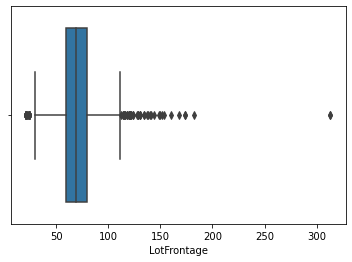

In [292]:
# Checking for presence of outliers in 'LotFrontage'
sns.boxplot(data['LotFrontage'])

As the boxplot indicates presence of outliers in 'Lotfrontage', it is better to replace the missing values with the median

In [293]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace =True)

In [294]:
data['LotFrontage'].isnull().sum()

0

In [295]:
# Missing values in Basement related variables can be treated as 'No Basement' category
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)

In [296]:
# Checking if all the missing values have vanished or not
missing_perc = pd.DataFrame(round((data.isnull().sum()/len(data.index)*100),2),columns= ['Missing_perc'])
missing_perc.sort_values(by = 'Missing_perc',  ascending = False).head(30)

,Missing_perc
MSSubClass,0.0
HalfBath,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0
FullBath,0.0


### CORRECTING THE DATA TYPES AND SEGMENTING THE VALUES, WHERE APPLICABLE

In [297]:
data['MSSubClass'] = data['MSSubClass'].astype('object')

In [298]:
data['MSSubClass'].dtype

dtype('O')

In [299]:
# To convert scale into rating
def scale(x):
    if (x in [10,9]):
        rating = 'Excellent'
    elif (x in [8,7]):
        rating = 'Good'
    elif (x in [6,5]):
        rating = 'Average'
    elif (x in [4,3]):
        rating = 'Fair'
    else:
        rating = 'Poor'
    return rating

In [300]:
data['OverallQual'] = data['OverallQual'].apply(lambda x:scale(x))

In [301]:
data['OverallQual'].value_counts()

Average      768
Good         482
Fair         136
Excellent     60
Poor           5
Name: OverallQual, dtype: int64

In [302]:
data['OverallCond'] = data['OverallCond'].apply(lambda x:scale(x))

In [303]:
data['OverallCond'].value_counts()

Average      1065
Good          277
Fair           81
Excellent      22
Poor            6
Name: OverallCond, dtype: int64

In [304]:
data['OverallCond'].dtype

dtype('O')

In [305]:
# Segmenting 'YearBuilt'
data['YearBuilt'].describe()

count    1451.000000
mean     1971.092350
std        30.190266
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [306]:
data['YearBuilt_cat'] = pd.qcut(data['YearBuilt'],4 , labels = ['1954 or older', '1955 - 1972', '1973 - 2000','2001 - 2010'])

In [307]:
data['YearBuilt_cat'].head(20)

0       2001 - 2010
1       1973 - 2000
2       2001 - 2010
3     1954 or older
4       1973 - 2000
5       1973 - 2000
6       2001 - 2010
7       1973 - 2000
8     1954 or older
9     1954 or older
10      1955 - 1972
11      2001 - 2010
12      1955 - 1972
13      2001 - 2010
14      1955 - 1972
15    1954 or older
16      1955 - 1972
17      1955 - 1972
18      2001 - 2010
19      1955 - 1972
Name: YearBuilt_cat, dtype: category
Categories (4, object): ['1954 or older' < '1955 - 1972' < '1973 - 2000' < '2001 - 2010']

In [308]:
data['YearBuilt_cat'] = data['YearBuilt_cat'].astype('object')

<AxesSubplot:xlabel='YearBuilt', ylabel='YearRemodAdd'>

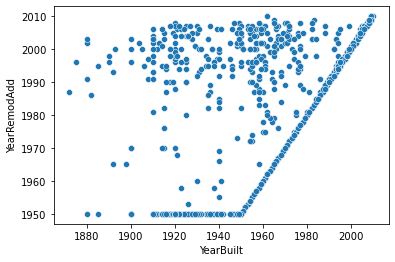

In [309]:
sns.scatterplot(x = data['YearBuilt'],y = data['YearRemodAdd'])

Most houses built before 1950 have been remodelled, whereas very few of those built after 1950 have been remodelled.<br>
We will make a category 'Original' for those not modified and rest can be segmented based on the year of remodelling.

In [310]:
# Segmenting 'YearRemodAdd'
data['YearRemodAdd'].describe()

count    1451.000000
mean     1984.760165
std        20.651334
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [311]:
df_remod = pd.Series(np.where(data['YearRemodAdd'] == data['YearBuilt'], 'Original', pd.qcut(data['YearRemodAdd'],4,\
labels = ['1950 - 1966', '1967 - 1993', '1994 - 2004', '2005 - 2010']))) 

In [312]:
df_remod.name = 'YearRemodAdd_cat'

In [313]:
df_remod.head()

0       Original
1       Original
2    1994 - 2004
3    1967 - 1993
4       Original
Name: YearRemodAdd_cat, dtype: object

In [314]:
data = pd.concat([data,df_remod],axis = 1)

In [315]:
data.drop('YearRemodAdd', axis = 1,inplace =True)

In [316]:
data.drop('YearBuilt',axis=1,inplace=True)

In [317]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_cat,YearRemodAdd_cat
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2001 - 2010,Original
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Average,Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1973 - 2000,Original
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2001 - 2010,1994 - 2004
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1954 or older,1967 - 1993
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1973 - 2000,Original


In [318]:
# Segmenting 'GarageYrBlt'
data['GarageYrBlt'].describe()

count    1451.000000
mean     1867.914542
std       454.981043
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [319]:
df_garage = pd.Series(np.where(data['GarageYrBlt'] == 0, 'No Garage', pd.qcut(data['GarageYrBlt'], 4 , \
labels = ['1961 or older', '1962 - 1979', '1980 - 2002','2003 - 2010'])))

In [320]:
df_garage.name = 'GarageYrBlt_cat'

In [321]:
df_garage.head()

0    2003 - 2010
1    1962 - 1979
2    1980 - 2002
3    1980 - 2002
4    1980 - 2002
Name: GarageYrBlt_cat, dtype: object

In [322]:
data = pd.concat([data,df_garage],axis = 1)

In [323]:
data.drop('GarageYrBlt',axis = 1, inplace =True)

In [324]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_cat,YearRemodAdd_cat,GarageYrBlt_cat
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2001 - 2010,Original,2003 - 2010
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Average,Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1973 - 2000,Original,1962 - 1979
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2001 - 2010,1994 - 2004,1980 - 2002
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1954 or older,1967 - 1993,1980 - 2002
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1973 - 2000,Original,1980 - 2002


In [325]:
data['YrSold'] = data['YrSold'].astype('object')

In [326]:
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['MoSold'] = data['MoSold'].apply(lambda x:month_labels[x])

In [327]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_cat,YearRemodAdd_cat,GarageYrBlt_cat
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500,2001 - 2010,Original,2003 - 2010
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Average,Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500,1973 - 2000,Original,1962 - 1979
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500,2001 - 2010,1994 - 2004,1980 - 2002
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000,1954 or older,1967 - 1993,1980 - 2002
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000,1973 - 2000,Original,1980 - 2002


In [328]:
data['YrSold'].dtype

dtype('O')

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1451 non-null   object 
 1   MSZoning          1451 non-null   object 
 2   LotFrontage       1451 non-null   float64
 3   LotArea           1451 non-null   int64  
 4   Street            1451 non-null   object 
 5   LotShape          1451 non-null   object 
 6   LandContour       1451 non-null   object 
 7   Utilities         1451 non-null   object 
 8   LotConfig         1451 non-null   object 
 9   LandSlope         1451 non-null   object 
 10  Neighborhood      1451 non-null   object 
 11  Condition1        1451 non-null   object 
 12  Condition2        1451 non-null   object 
 13  BldgType          1451 non-null   object 
 14  HouseStyle        1451 non-null   object 
 15  OverallQual       1451 non-null   object 
 16  OverallCond       1451 non-null   object 


### DATA EXPLORATION

In [330]:
data_num = data.select_dtypes(include = ['float64','int64'])

In [331]:
data_cat = data.select_dtypes(include = 'object')

In [332]:
data_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [333]:
data_num.shape

(1451, 29)

<AxesSubplot:xlabel='SalePrice'>

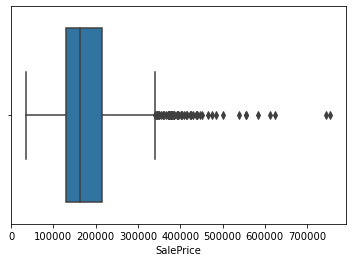

In [334]:
sns.boxplot(data['SalePrice'])

'SalePrice' has quite a lot of outliers on the upper side

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

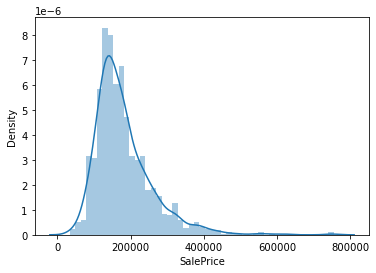

In [335]:
sns.distplot(data["SalePrice"])

SalePrice has a right-skewed (non-normal) distribution. We need to take a log transform of this variable.

In [336]:
data['SalePrice_log'] = np.log(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice_log'>

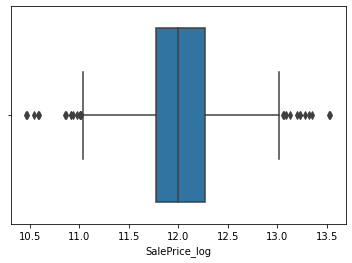

In [337]:
sns.boxplot(data['SalePrice_log'])

<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

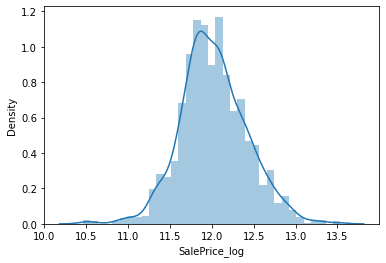

In [338]:
sns.distplot(data['SalePrice_log'])

In [339]:
data_num = pd.concat([data_num,data['SalePrice_log']],axis=1)

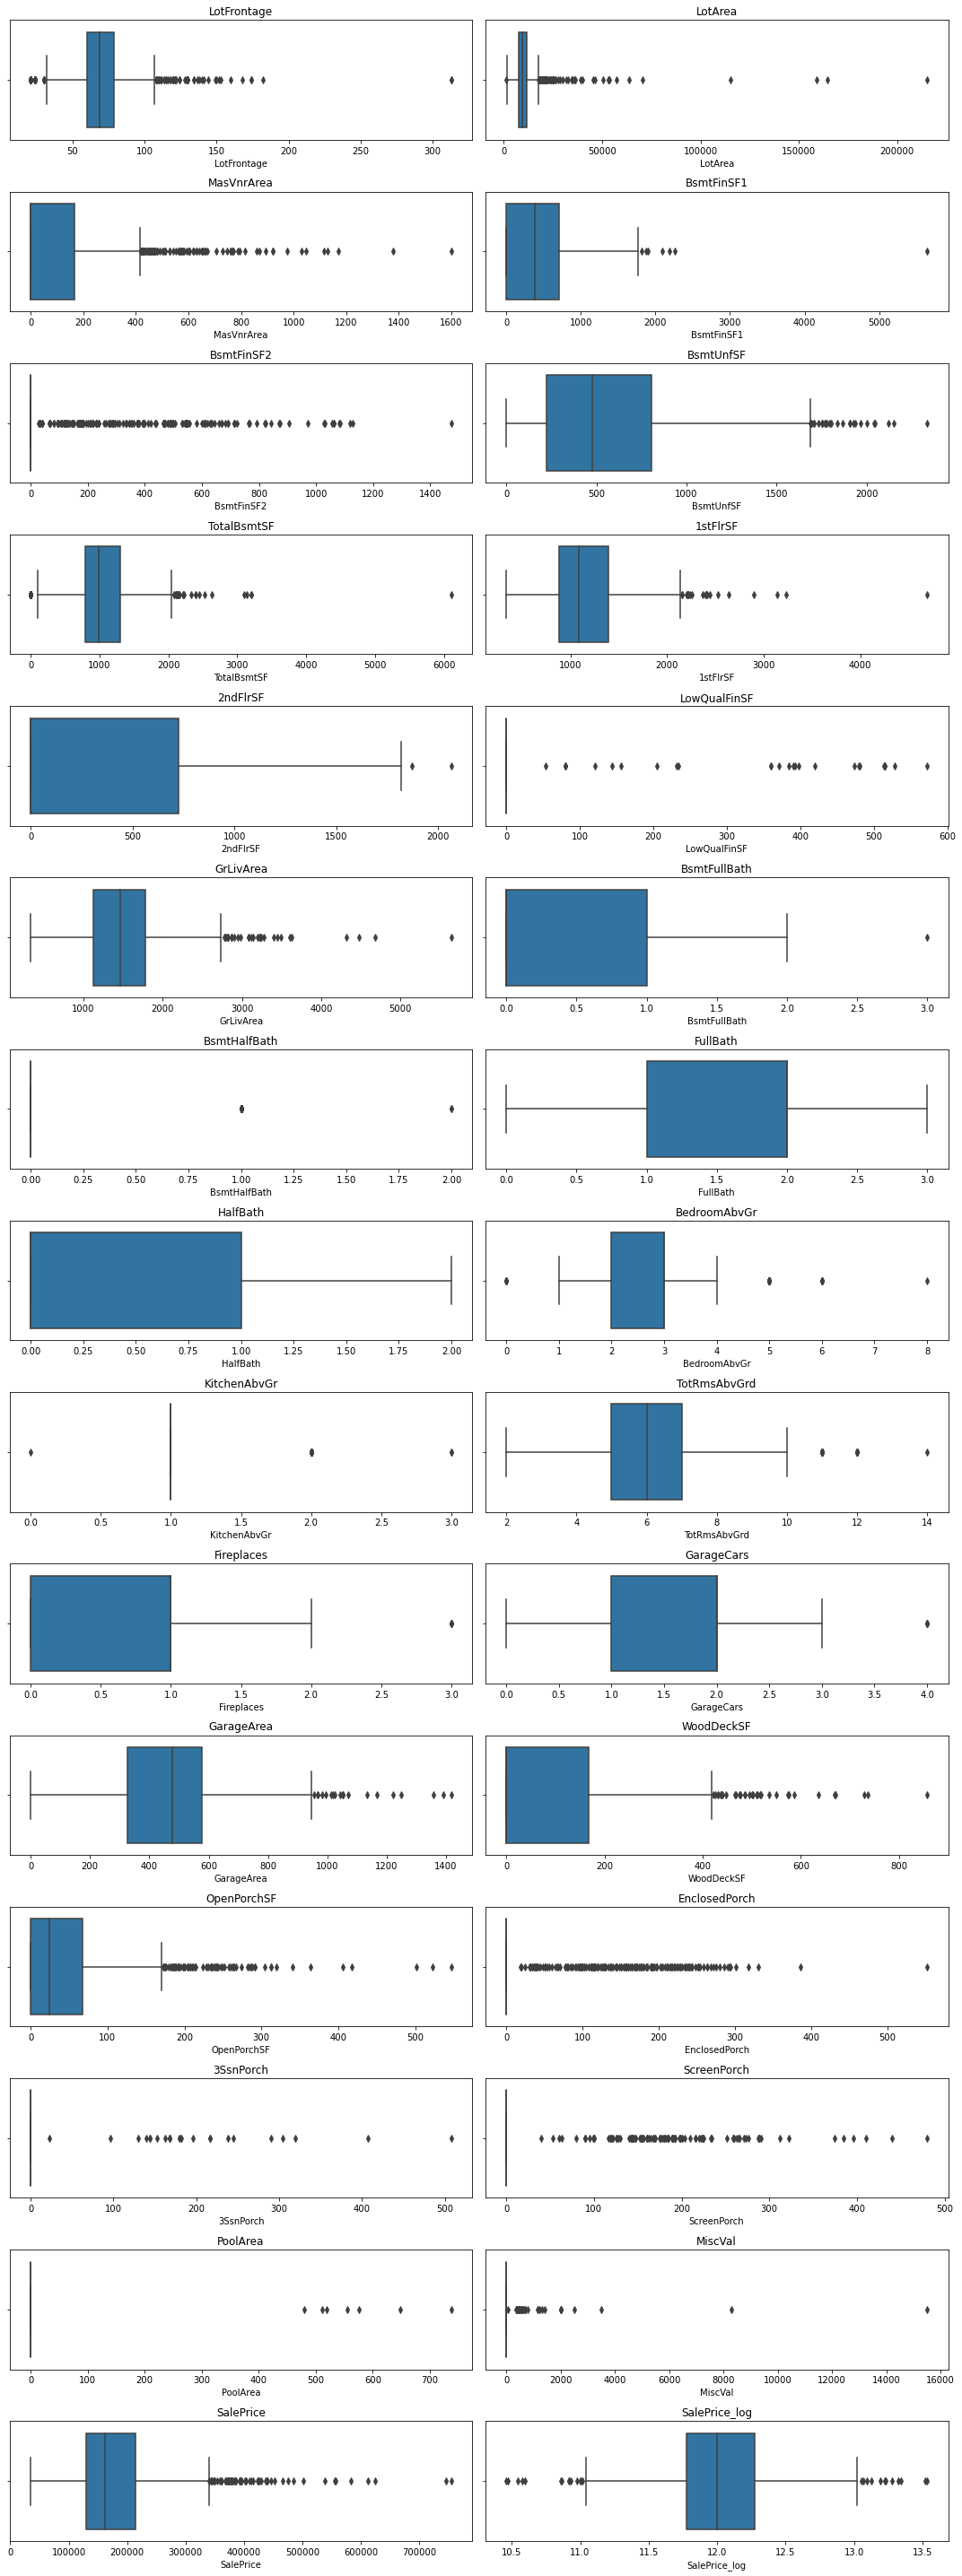

In [202]:
# Checking for outliers in other variables
a = 15
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 40)

for var in data_num:
    plt.subplot(a, b, c)
    plt.title(var)
    plt.xlabel(var)
    sns.boxplot(data_num[var])
    c = c + 1
    plt.tight_layout()
plt.show()


In [340]:
# Checking for skewness in independent variables
skew_in_vars = data_num.iloc[:,:-2].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

MiscVal          24.376280
PoolArea         14.766783
LotArea          12.223089
3SsnPorch        10.261120
LowQualFinSF      8.973279
KitchenAbvGr      4.508151
BsmtFinSF2        4.235845
ScreenPorch       4.103163
BsmtHalfBath      4.084356
EnclosedPorch     3.090802
MasVnrArea        2.665258
LotFrontage       2.416964
OpenPorchSF       2.382442
BsmtFinSF1        1.700822
WoodDeckSF        1.540277
TotalBsmtSF       1.533978
GrLivArea         1.372092
1stFlrSF          1.371722
BsmtUnfSF         0.919025
2ndFlrSF          0.814923
HalfBath          0.684419
TotRmsAbvGrd      0.680159
Fireplaces        0.647074
BsmtFullBath      0.603565
BedroomAbvGr      0.217622
GarageArea        0.182396
FullBath          0.037717
GarageCars       -0.337070
dtype: float64

In [341]:
high_skew = skew_in_vars[(skew_in_vars > 0.5) | (skew_in_vars < -0.5)]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [342]:
len(skew_index)

24

In [343]:
# Transforming the skewed independent variables
for i in skew_index:
    data_num[i] = np.log1p(data_num[i])

In [344]:
data_num.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         14.303405
3SsnPorch         7.701985
LowQualFinSF      7.428414
MiscVal           5.147692
BsmtHalfBath      3.914625
KitchenAbvGr      3.879409
ScreenPorch       3.134682
BsmtFinSF2        2.509955
EnclosedPorch     2.108047
SalePrice         1.881164
HalfBath          0.573980
MasVnrArea        0.492764
BsmtFullBath      0.425829
2ndFlrSF          0.289721
BedroomAbvGr      0.217622
GarageArea        0.182396
Fireplaces        0.178958
WoodDeckSF        0.149995
SalePrice_log     0.121812
1stFlrSF          0.071732
FullBath          0.037717
GrLivArea        -0.003039
OpenPorchSF      -0.020742
TotRmsAbvGrd     -0.054630
LotArea          -0.142304
GarageCars       -0.337070
BsmtFinSF1       -0.617616
LotFrontage      -0.868161
BsmtUnfSF        -2.177593
TotalBsmtSF      -5.140796
dtype: float64

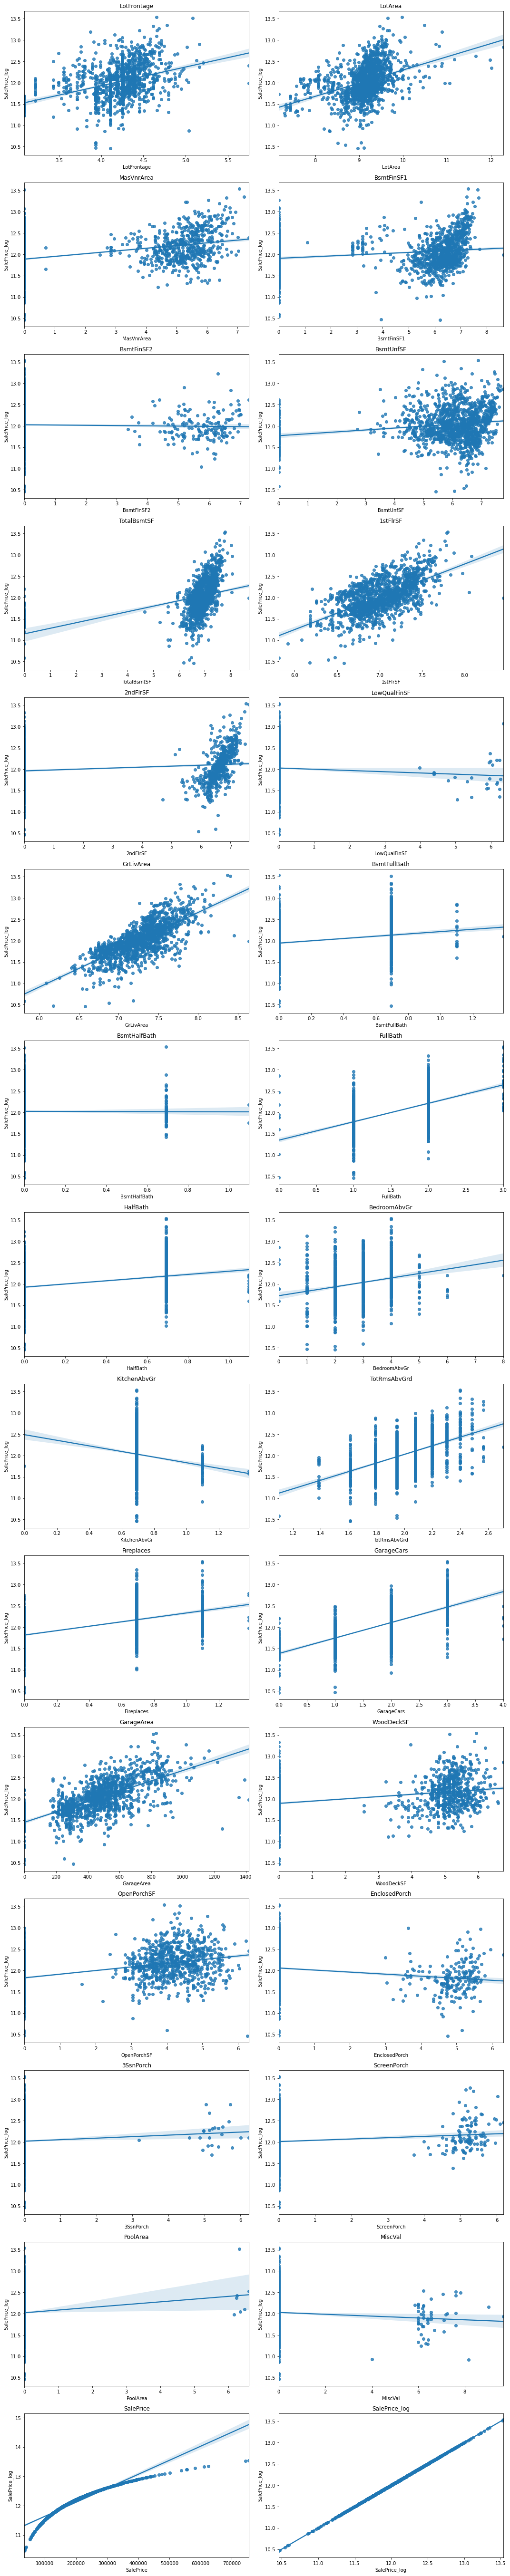

In [208]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for var in data_num:
    plt.subplot(a, b, c)
    plt.title(var)
    plt.xlabel(var)
    sns.regplot(data_num[var], data_num['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

<AxesSubplot:>

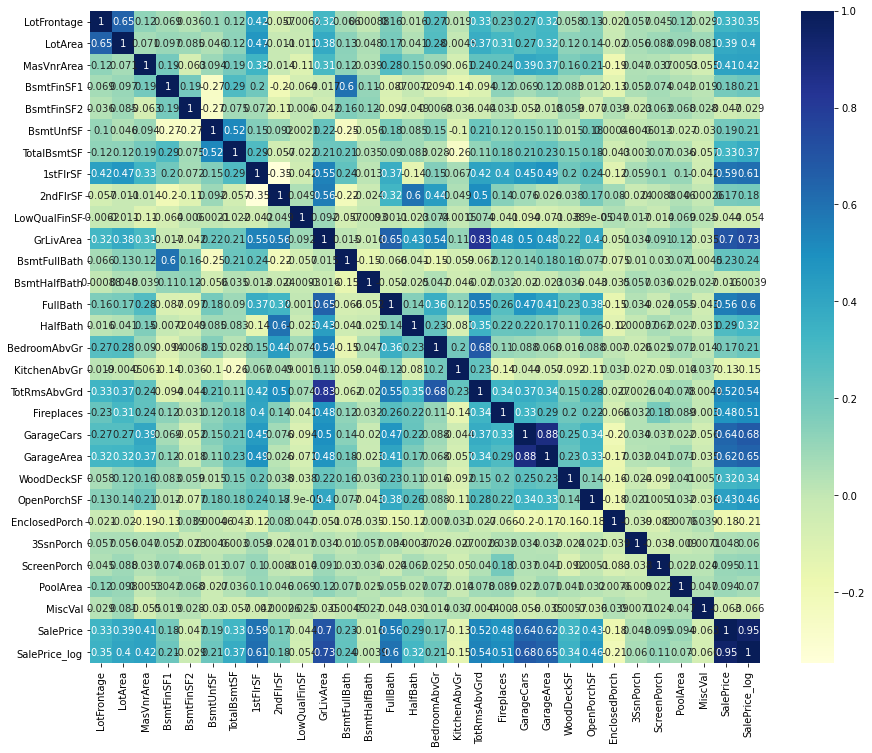

In [209]:
plt.figure(figsize = (15,12))
sns.heatmap(data_num.corr(),annot= True, cmap = 'YlGnBu')

1. Saleprice/SalePrice_log seems to be most correlated with GrLivArea , followed by GarageCars , GarageArea , TotalBsmtSF and 1stFlrSF<br>
2. High correlation is also observed among the variables, eg. between LotFrontage and LotArea, TotRmsAbvGrd and GrLivArea

In [345]:
data_cat.shape

(1451, 47)

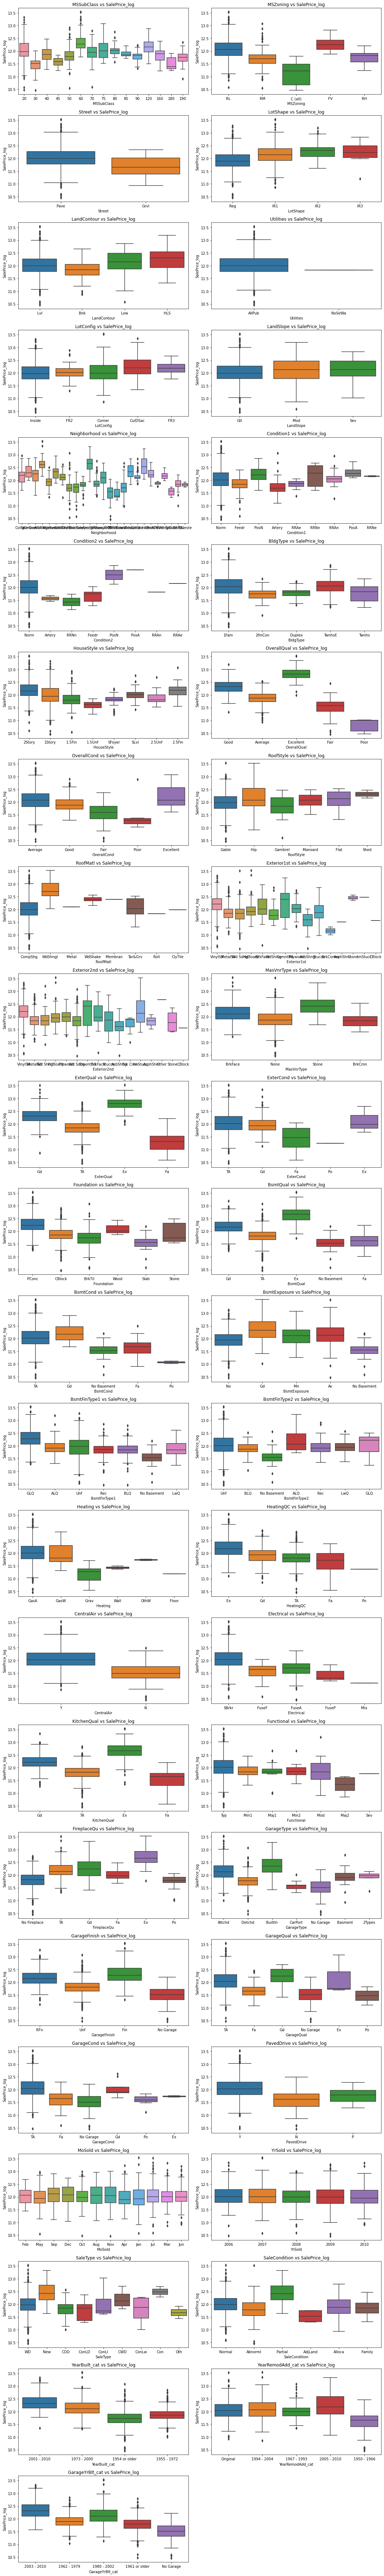

In [211]:
# Assessing the relation between SalePrice_log and categorical variables
a = 24
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15,100)

for var in data_cat:
    plt.subplot(a, b, c)
    plt.title(f'{var} vs SalePrice_log')
    plt.xlabel(var)
    plt.ylabel('SalePrice_log')
    sns.boxplot(x = data_cat[var], y = data['SalePrice_log'])
    c = c + 1
    plt.tight_layout()
plt.show()

In [346]:
data['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

In [347]:
# As Utilities has predominantly just one value, this variable can be dropped.
data.drop('Utilities',axis = 1, inplace = True)

In [348]:
data_cat.drop('Utilities',axis=1,inplace=True)

In [349]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_cat,YearRemodAdd_cat,GarageYrBlt_cat,SalePrice_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500,2001 - 2010,Original,2003 - 2010,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Average,Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500,1973 - 2000,Original,1962 - 1979,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500,2001 - 2010,1994 - 2004,1980 - 2002,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000,1954 or older,1967 - 1993,1980 - 2002,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000,1973 - 2000,Original,1980 - 2002,12.429216


### CREATING DUMMY VARIABLES

In [350]:
df = pd.DataFrame()
for var in data_cat:
    df_cat = pd.get_dummies(data_cat[var],drop_first=True,prefix = var)
    df = pd.concat([df,df_cat],axis = 1)
    data.drop(var,axis=1,inplace=True)
data_final = pd.concat([data_num,df],axis=1)

In [351]:
data_final.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_log,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

In [352]:
# Removing 'SalePrice', keeping 'SalePrice_log' to be used as the dependent variable
sale = data_final.pop('SalePrice')
sale.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [353]:
data_final.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice_log,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,

In [354]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1451.0,4.214147,0.314533,3.091042,4.110874,4.248495,4.382027,5.749393
LotArea,1451.0,9.110148,0.517303,7.170888,8.927778,9.156729,9.358847,12.279537
MasVnrArea,1451.0,2.133415,2.631576,0.000000,0.000000,0.000000,5.117994,7.378384
BsmtFinSF1,1451.0,4.227567,2.990287,0.000000,0.000000,5.945421,6.562443,8.638525
BsmtFinSF2,1451.0,0.659463,1.850037,0.000000,0.000000,0.000000,0.000000,7.296413
BsmtUnfSF,1451.0,5.645394,1.858584,0.000000,5.407162,6.173786,6.695799,7.756623
TotalBsmtSF,1451.0,6.748903,1.148432,0.000000,6.679599,6.899723,7.168965,8.717846
1stFlrSF,1451.0,7.007763,0.316834,5.814131,6.783325,6.991177,7.238497,8.453827
2ndFlrSF,1451.0,2.863738,3.292888,0.000000,0.000000,0.000000,6.591674,7.633370
LowQualFinSF,1451.0,0.100433,0.749628,0.000000,0.000000,0.000000,0.000000,6.350886


### SPLITTING AND SCALING THE DATA

In [355]:
cols = data_final.columns
cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'YearBuilt_cat_1973 - 2000', 'YearBuilt_cat_2001 - 2010',
       'YearRemodAdd_cat_1967 - 1993', 'YearRemodAdd_cat_1994 - 2004',
       'YearRemodAdd_cat_2005 - 2010', 'YearRemodAdd_cat_Original',
       'GarageYrBlt_cat_1962 - 1979', 'GarageYrBlt_cat_1980 - 2002',
       'GarageYrBlt_cat_2003 - 2010', 'GarageYrBlt_cat_No Garage'],
      dtype='object', length=286)

In [356]:
y = data_final.pop('SalePrice_log').values.reshape(-1,1)
X = data_final

In [357]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=44)

In [358]:
X_train.shape

(1015, 285)

In [359]:
X_test.shape

(436, 285)

In [360]:
y_train.shape

(1015, 1)

In [361]:
y_test.shape

(436, 1)

In [362]:
# Scaling the X_train and X_test
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)

In [363]:
X_test_scaled = scale.transform(X_test)

In [364]:
X_train_scaled

array([[0.43540262, 0.40911168, 0.74748627, ..., 0.        , 0.        ,
        0.        ],
       [0.43540262, 0.15489035, 0.4233777 , ..., 0.        , 1.        ,
        0.        ],
       [0.43540262, 0.36615041, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46633838, 0.37876837, 0.74015266, ..., 1.        , 0.        ,
        0.        ],
       [0.42998996, 0.39872276, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18525641, 0.18291881, 0.63187309, ..., 0.        , 1.        ,
        0.        ]])

### MODEL BUILDING AND EVALUATION

#### LINEAR REGRESSION

In [365]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [366]:
print(lm.intercept_)
print(lm.coef_)

[-2.36630497e+09]
[[ 8.90951993e-02  4.68813070e-01  5.52334459e-02  1.64065816e-01
   1.01068575e-02  1.22096634e-03  8.81472206e-01 -5.67460064e-02
  -2.53611375e-02 -5.49276541e-02  1.13523230e+00  3.37029192e-02
   9.85062004e-03  9.86187289e-02  3.36117124e-02 -3.74956139e-02
  -6.05766364e-02 -6.51382526e-02  2.13820077e-02  8.40019301e-02
   1.44356195e-01  3.25871949e-02  1.85929238e-02 -2.32428776e-03
   4.89189057e-02  3.73260586e-02  2.18749072e-01 -2.35720532e-02
  -2.73090218e-02 -2.06620544e-03 -3.77210780e+10 -4.30105397e-02
   3.60026458e-02  8.11288685e-02 -1.80578771e-01  3.30355851e-02
   3.39623830e-02 -8.07640054e+10  2.76197529e-02  1.79020605e-02
   9.53673576e-02 -1.72035882e-01  6.56625074e-01  6.46151254e-01
   6.01137673e-01  5.70756200e-01  2.98411885e-02  2.77636283e-02
   5.46476527e-02  1.88379337e-02 -6.12852576e-03 -1.13505566e-02
  -1.46141014e-02  2.68061085e-02 -5.83052118e-02 -4.47720169e-02
  -1.51453654e-02  1.96477169e-02 -9.93243389e-02  7.79930

In [367]:
y_pred_train_lm = lm.predict(X_train_scaled)
y_pred_test_lm = lm.predict(X_test_scaled)

In [368]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lm))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lm))))

Root Mean Square Error train = 0.08218436382223518
Root Mean Square Error test = 2478566279.79175


In [369]:
r2_train_lm = r2_score(y_train, y_pred_train_lm)
print(r2_train_lm)

r2_test_lm = r2_score(y_test, y_pred_test_lm)
print(r2_test_lm)

0.9579251822483803
-3.912456277519511e+19


Clearly, this is a case of overfitting as r2 score on train data is very high whereas on test data, it is negative i.e. the model does not fit the data at all. <br>
Therefore, we need to use regularization.

#### RESIDUAL ANALYSIS

Text(0.5, 0, 'Errors')

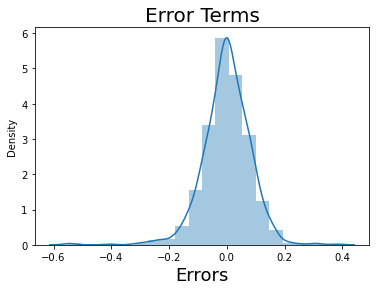

In [370]:
res = y_train - y_pred_train_lm

sns.distplot(res, bins = 20)
plt.title('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'y_train')

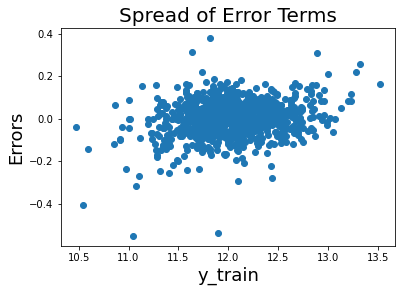

In [371]:
plt.scatter(x= y_train, y = res)
plt.title('Spread of Error Terms', fontsize = 20)                   
plt.ylabel('Errors', fontsize = 18) 
plt.xlabel('y_train', fontsize = 18)

#### RIDGE REGRESSION

In [374]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [375]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [376]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
print(ridge.coef_)

[[ 2.79002812e-02  2.18278136e-01  2.70617982e-02  1.07629007e-01
   3.52435944e-02  4.51929106e-03  1.29862592e-01  2.73066373e-01
   5.89009270e-02  8.41496052e-03  3.48239436e-01  4.06698928e-02
   1.55815639e-03  1.68175325e-01  6.14656185e-02  3.32087048e-02
  -3.48923204e-02  1.08468286e-01  2.78297297e-02  1.65669203e-01
   8.11645038e-02  2.66816748e-02  4.12762614e-02  1.00257081e-02
   4.25464964e-02  5.56189786e-02 -2.45891264e-02 -2.19800693e-02
  -3.96770339e-02  1.44767240e-03  5.75833344e-04 -1.21973423e-02
  -1.77383390e-02  6.98733034e-02  5.65416335e-02  9.23107359e-03
   1.08357145e-04 -1.68345263e-02 -1.85694812e-02 -5.10936754e-02
  -2.20684928e-02 -2.15722586e-02  1.21351221e-01  1.40571913e-01
   1.27369664e-01  1.21007403e-01  7.39501024e-02  4.13005080e-02
  -7.25237525e-02  1.01894968e-02  4.67331844e-02  5.66466352e-02
   3.12824006e-02  4.93268460e-02 -4.29626542e-02 -2.98038490e-02
  -1.18712246e-02  2.93495919e-02  6.42458193e-03  2.04669074e-03
  -1.10405

In [377]:
y_pred_train_ridge = ridge.predict(X_train_scaled)
y_pred_test_ridge = ridge.predict(X_test_scaled)

In [378]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))))

Root Mean Square Error train = 0.10428194985441679
Root Mean Square Error test = 0.12624744248070338


In [379]:
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.9322573574239471
0.898493558913536


#### LASSO REGRESSION

In [244]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [245]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [246]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
print(lasso.coef_)

[ 1.41246873e-02  4.12194551e-01  1.21626795e-02  9.81032071e-02
  0.00000000e+00 -9.54918693e-03  3.13105538e-01  4.65093175e-03
 -2.37908009e-02 -3.73724327e-02  1.04265948e+00  4.20449223e-02
  1.03254219e-02  1.14210527e-01  3.19374061e-02 -1.13373895e-02
 -3.21555126e-02 -4.32940387e-03  0.00000000e+00  2.06510697e-01
  9.33634139e-03  2.40443374e-02  2.70174077e-02 -4.32645692e-04
  3.74361929e-02  5.02842020e-02 -0.00000000e+00 -1.84492392e-02
 -2.34941877e-02 -0.00000000e+00  0.00000000e+00 -1.46812343e-02
  1.58434093e-03  5.50141034e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.25823305e-02 -0.00000000e+00 -3.05786712e-02
  0.00000000e+00 -2.76798565e-02  4.94070019e-01  4.92623578e-01
  4.62835282e-01  4.46295577e-01  4.91447610e-02  2.72634473e-02
 -7.78335182e-02  1.57337633e-02  1.47484617e-02  1.06293197e-02
  5.55596162e-03  3.99877294e-02 -5.28752422e-02 -1.92463506e-02
 -1.24136554e-02  1.93929618e-02 -0.00000000e+00  0.00000000e+00
  7.66513281e-03  1.70172

In [247]:
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

In [248]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))))

Root Mean Square Error train = 0.09039878795958176
Root Mean Square Error test = 0.13935724707743524


In [249]:
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.949093989428755
0.8763177035366189


In [250]:
# Comparing the model parameters
betas = pd.DataFrame(index=X_train.columns)

In [251]:
betas['Ridge'] = ridge.coef_.reshape(-1,1)
betas['Lasso'] = lasso.coef_.reshape(-1,1)

In [252]:
betas.sort_values(by= 'Ridge', ascending = False)

,Ridge,Lasso
GrLivArea,0.348239,1.042659
1stFlrSF,0.273066,0.004651
LotArea,0.218278,0.412195
OverallQual_Excellent,0.169183,0.169385
FullBath,0.168175,0.114211
GarageCars,0.165669,0.206511
MSZoning_RH,0.140572,0.492624
TotalBsmtSF,0.129863,0.313106
MSZoning_RL,0.127370,0.462835
RoofMatl_WdShngl,0.125821,0.663887


In [253]:
# Finding predictor significance (From most to least significant)
def significance(var):
    value = pd.Series(np.absolute(var))
    sign = pd.Series(var.apply(lambda x: 'Positive' if x>=0 else 'Negative'))
    Predictor_significance = pd.concat([value,sign],axis=1)
    Predictor_significance.columns = ['Weightage', 'Impact']
    return Predictor_significance.sort_values(by  = 'Weightage',ascending=False)

In [254]:
significance(betas['Ridge'])

,Weightage,Impact
GrLivArea,0.348239,Positive
1stFlrSF,0.273066,Positive
LotArea,0.218278,Positive
Condition2_PosN,0.205354,Negative
OverallQual_Excellent,0.169183,Positive
FullBath,0.168175,Positive
GarageCars,0.165669,Positive
MSZoning_RH,0.140572,Positive
TotalBsmtSF,0.129863,Positive
MSZoning_RL,0.127370,Positive


In [255]:
significance(betas['Lasso'])

,Weightage,Impact
GrLivArea,1.042659,Positive
Condition2_PosN,1.038558,Negative
RoofMatl_WdShngl,0.663887,Positive
RoofMatl_CompShg,0.582522,Positive
RoofMatl_WdShake,0.577456,Positive
RoofMatl_Membran,0.509897,Positive
RoofMatl_Tar&Grv,0.509092,Positive
MSZoning_FV,0.494070,Positive
MSZoning_RH,0.492624,Positive
MSZoning_RL,0.462835,Positive


### CODE FOR SUBJECTIVE QUESTIONS

In [256]:
# Doubling the value of alpha for ridge regression
alpha = 6
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train_scaled, y_train)
print(ridge_double.coef_)

[[ 3.67462482e-02  1.66431151e-01  2.77477135e-02  9.43893442e-02
   2.67438697e-02  9.39822350e-03  9.80214072e-02  2.33187891e-01
   5.64842204e-02  1.15581763e-02  2.68812857e-01  4.07322451e-02
  -7.93524330e-04  1.60828788e-01  6.38861899e-02  4.30397720e-02
  -2.10571554e-02  1.30055203e-01  3.75601196e-02  1.50713470e-01
   9.27942693e-02  2.70753732e-02  4.56827272e-02  1.11577474e-02
   3.05883638e-02  5.27826750e-02 -1.34338936e-02 -2.43554773e-02
  -5.11641430e-02  1.80960162e-03 -1.12835909e-03 -9.02900144e-03
  -2.04175738e-02  6.30023645e-02  5.53018742e-02  5.09516551e-03
   3.92879078e-03 -9.68345248e-03 -1.82387530e-02 -5.31590137e-02
  -2.20310423e-02 -1.21609245e-02  7.38764763e-02  8.65873163e-02
   8.28322191e-02  6.35438004e-02  5.31646511e-02  4.38088645e-02
  -5.03658176e-02  6.61166882e-03  4.20655794e-02  4.79996717e-02
   2.62797713e-02  5.03083688e-02 -3.59975398e-02 -1.87060639e-02
  -1.12222641e-02  3.04646783e-02  7.69953180e-03  2.21318659e-03
  -8.56870

In [257]:
y_pred_train_ridge = ridge_double.predict(X_train_scaled)
y_pred_test_ridge = ridge_double.predict(X_test_scaled)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))))

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

Root Mean Square Error train = 0.10999780519467962
Root Mean Square Error test = 0.126190421993249
0.924627679270643
0.898585230309878


In [258]:
betas['Ridge_double'] = ridge_double.coef_.reshape(-1,1)

In [259]:
significance(betas['Ridge_double'])

,Weightage,Impact
GrLivArea,0.268813,Positive
1stFlrSF,0.233188,Positive
OverallQual_Excellent,0.168135,Positive
LotArea,0.166431,Positive
FullBath,0.160829,Positive
GarageCars,0.150713,Positive
TotRmsAbvGrd,0.130055,Positive
Condition2_PosN,0.116988,Negative
Neighborhood_Crawfor,0.115742,Positive
Neighborhood_NoRidge,0.106960,Positive


In [260]:
# Doubling the value of alpha for lasso regression
alpha = 0.0002
lasso_double = Lasso(alpha=alpha)

lasso_double.fit(X_train_scaled, y_train)
print(lasso_double.coef_)

[ 0.00000000e+00  3.82955693e-01  0.00000000e+00  9.07295058e-02
  0.00000000e+00 -5.74181720e-03  1.91345482e-01  1.37084301e-02
 -2.09577317e-02 -3.01148249e-02  1.01776707e+00  3.96288749e-02
  2.95528703e-03  1.19768004e-01  3.46943173e-02 -0.00000000e+00
 -4.40114108e-02  0.00000000e+00  0.00000000e+00  2.25369623e-01
  0.00000000e+00  2.27441844e-02  2.77286921e-02 -0.00000000e+00
  1.95585898e-02  5.01537510e-02 -1.99064533e-02 -1.78305201e-02
 -1.99877841e-02 -0.00000000e+00  0.00000000e+00 -1.06646222e-02
 -0.00000000e+00  5.06297454e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.00465912e-02 -0.00000000e+00 -2.92957819e-02
 -0.00000000e+00 -1.36975428e-02  3.62100488e-01  3.66280804e-01
  3.50311175e-01  3.36043394e-01  4.09476705e-02  2.64171059e-02
 -1.19671881e-01  1.27829614e-02  2.61531037e-02  1.85921994e-02
  1.17804561e-02  4.61845303e-02 -4.44432018e-02 -0.00000000e+00
 -9.12196083e-03  1.67942675e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.92877

In [261]:
y_pred_train_lasso = lasso_double.predict(X_train_scaled)
y_pred_test_lasso = lasso_double.predict(X_test_scaled)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))))

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

Root Mean Square Error train = 0.09765739138751299
Root Mean Square Error test = 0.1306847544143808
0.9405907476847285
0.8912327181321353


In [262]:
betas['Lasso_double'] = lasso_double.coef_.reshape(-1,1)

significance(betas['Lasso_double'])

,Weightage,Impact
GrLivArea,1.017767,Positive
Condition2_PosN,0.857384,Negative
LotArea,0.382956,Positive
MSZoning_RH,0.366281,Positive
MSZoning_FV,0.362100,Positive
MSZoning_RL,0.350311,Positive
MSZoning_RM,0.336043,Positive
Exterior1st_BrkComm,0.300239,Negative
GarageCars,0.225370,Positive
TotalBsmtSF,0.191345,Positive


In [263]:
# Excluding the top 5 variables determined by Lasso regression and re-building the model
data_lasso = data_final.drop(['GrLivArea','Condition2_PosN' ,'RoofMatl_WdShngl', 'RoofMatl_CompShg','RoofMatl_WdShake'],axis=1)
data_lasso.shape

(1451, 280)

In [264]:
X = data_lasso

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=44)

In [265]:
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'YearBuilt_cat_1973 - 2000', 'YearBuilt_cat_2001 - 2010',
       'YearRemodAdd_cat_1967 - 1993', 'YearRemodAdd_cat_1994 - 2004',
       'YearRemodAdd_cat_2005 - 2010', 'YearRemodAdd_cat_Original',
       'GarageYrBlt_cat_1962 - 1979', 'GarageYrBlt_cat_1980 - 2002',
       'GarageYrBlt_cat_2003 - 2010', 'GarageYrBlt_cat_No Garage'],
      dtype='object', length=280)

In [266]:
y

array([[12.24769432],
       [12.10901093],
       [12.31716669],
       ...,
       [12.49312952],
       [11.86446223],
       [11.90158345]])

In [267]:
# Scaling the X_train and X_test
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.transform(X_test)

X_train_scaled

array([[0.43540262, 0.40911168, 0.74748627, ..., 0.        , 0.        ,
        0.        ],
       [0.43540262, 0.15489035, 0.4233777 , ..., 0.        , 1.        ,
        0.        ],
       [0.43540262, 0.36615041, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46633838, 0.37876837, 0.74015266, ..., 1.        , 0.        ,
        0.        ],
       [0.42998996, 0.39872276, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18525641, 0.18291881, 0.63187309, ..., 0.        , 1.        ,
        0.        ]])

In [268]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 



Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [269]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [270]:
alpha = 0.001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_scaled, y_train)
print(lasso_new.coef_)

[ 0.          0.30330926  0.          0.10651549  0.          0.
  0.09399466  0.65252111  0.10185937  0.          0.02159511  0.
  0.16427491  0.06826825  0.         -0.          0.12489216  0.
  0.26150767  0.          0.0212498   0.04473589  0.          0.
  0.0438274  -0.         -0.         -0.05736701 -0.         -0.
 -0.          0.          0.02317102  0.02068986  0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.01862563 -0.          0.          0.01876264 -0.
 -0.          0.00268856  0.          0.          0.04471363 -0.
 -0.         -0.002281    0.01041878 -0.          0.         -0.
  0.          0.02283855 -0.          0.13003431 -0.05224929 -0.
 -0.04371187 -0.         -0.         -0.00727197  0.          0.
  0.07839003  0.09625198 -0.03497252  0.         -0.         -0.
  0.07570254  0.06616051  0.          0.         -0.02213668  0.03316851
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.0

In [271]:
y_pred_train_lasso = lasso_new.predict(X_train_scaled)
y_pred_test_lasso = lasso_new.predict(X_test_scaled)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))))

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)



Root Mean Square Error train = 0.12491189083539146
Root Mean Square Error test = 0.12951643382111666
0.9028033239571305
0.8931687822260634


In [272]:
betas_lasso_new = pd.Series(lasso_new.coef_)
betas_lasso_new.index = X_train.columns

In [273]:
significance(betas_lasso_new)

,Weightage,Impact
1stFlrSF,0.652521,Positive
LotArea,0.303309,Positive
GarageCars,0.261508,Positive
OverallQual_Excellent,0.248108,Positive
FullBath,0.164275,Positive
Neighborhood_Crawfor,0.130034,Positive
TotRmsAbvGrd,0.124892,Positive
BsmtFinSF1,0.106515,Positive
CentralAir_Y,0.102340,Positive
2ndFlrSF,0.101859,Positive
